In [3]:
import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [23]:
quality = ctrl.Antecedent(np.arange(0,11,1), 'quality')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip     = ctrl.Consequent(np.arange(0,26,1), 'tip')

In [24]:
quality.automf(3)
service.automf(3)

In [25]:
tip['low']    = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0,13, 25])
tip['high']   = fuzz.trimf(tip.universe, [13,25,25])

c:\Users\luisb\.pyenv\pyenv-win\versions\3.11.6\Lib\site-packages\skfuzzy\control\term.py:74: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


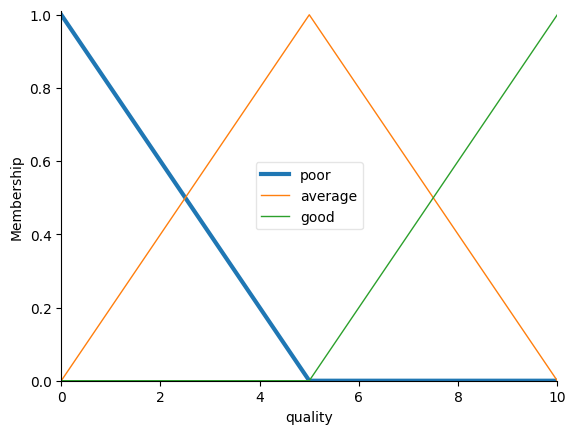

In [26]:
quality['poor'].view()

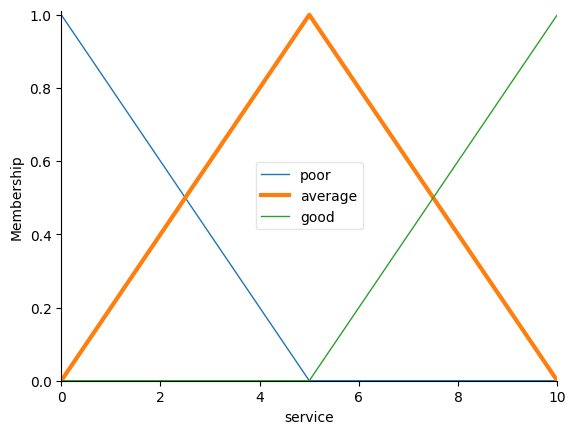

In [27]:
service['average'].view()

c:\Users\luisb\.pyenv\pyenv-win\versions\3.11.6\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


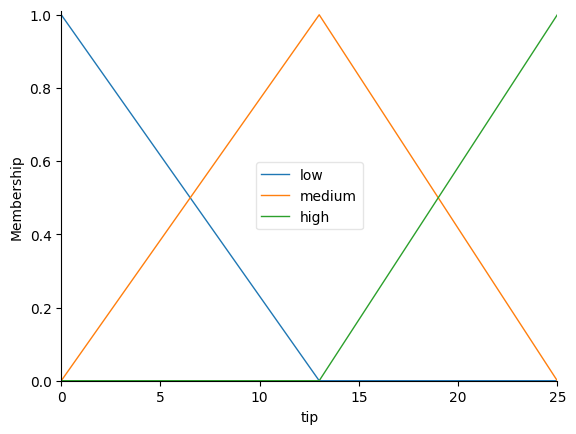

In [28]:
tip.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

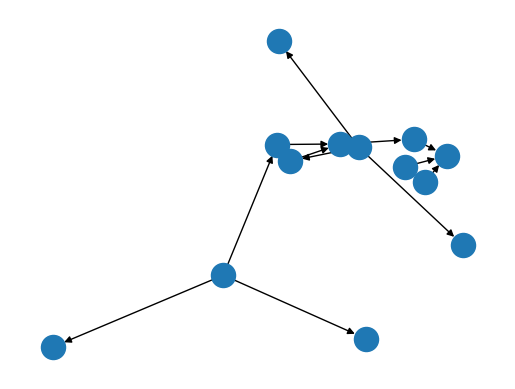

In [29]:
rule1 = ctrl.Rule(quality['poor'] & service['poor'], tip['low'])
rule1.view
rule1.view()

In [30]:
rule2 = ctrl.Rule(quality['average'] & service['average'], tip['medium'])
rule3 = ctrl.Rule(quality['good'] & service['good'], tip['high'])

In [31]:
tipping_ctrl = ctrl.ControlSystem((rule1, rule2, rule3))
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [32]:
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()


In [33]:
print(tipping.output['tip'])

17.93427234232227


c:\Users\luisb\.pyenv\pyenv-win\versions\3.11.6\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


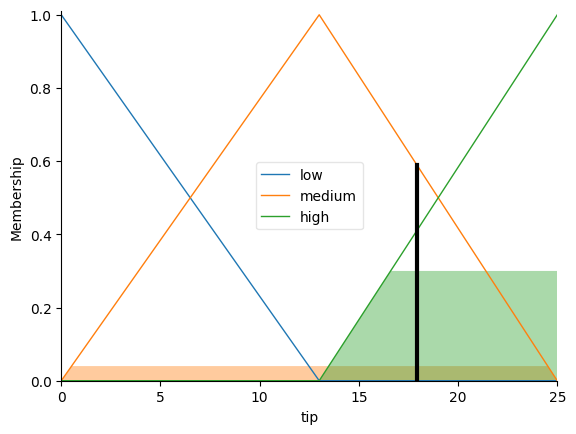

In [34]:
tip.view(sim=tipping)